In [1]:
pip install tensorflow pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define paths
base_dir = 'C:/Users/maryc/Documents/chickendetection code/archive (2)'
train_dir = os.path.join(base_dir, 'Train')
csv_file = os.path.join(base_dir, 'train_data.csv')

# Load CSV file
data = pd.read_csv(csv_file)

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the data for validation
)

# Create a generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=train_dir,
    x_col='images',  # make sure this matches the column name in your CSV
    y_col='label',  # make sure this matches the column name in your CSV
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='training'
)

# Create a generator for validation data
validation_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=train_dir,
    x_col='images',  # make sure this matches the column name in your CSV
    y_col='label',  # make sure this matches the column name in your CSV
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='validation'
)

# Number of classes
num_classes = len(train_generator.class_indices)

# Load the pretrained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Use softmax for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers (so their parameters will not be updated during training)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('chicken_disease_model.h5')


Found 6454 validated image filenames belonging to 4 classes.
Found 1613 validated image filenames belonging to 4 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 946s 9s/step - accuracy: 0.3896 - loss: 1.3079 - val_accuracy: 0.7063 - val_loss: 0.9505
25/25 ━━━━━━━━━━━━━━━━━━━━ 176s 7s/step - accuracy: 0.6912 - loss: 0.9613


Validation Accuracy: 70.44%


In [2]:
pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
# Load the saved model
model = tf.keras.models.load_model('chicken_disease_model.h5')

# Define paths
base_dir = 'C:/Users/maryc/Documents/chickendetection code/archive (2)'
train_dir = os.path.join(base_dir, 'Train')
csv_file = os.path.join(base_dir, 'train_data.csv')

# Load CSV file
data = pd.read_csv(csv_file)

# Create ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a generator for validation data
batch_size = 64
validation_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=train_dir,
    x_col='images',  # make sure this matches the column name in your CSV
    y_col='label',  # make sure this matches the column name in your CSV
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='validation'
)

# Get the ground truth labels and predictions
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate different metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
cm = confusion_matrix(y_true, y_pred_classes)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Additional metrics can be added here as needed


Found 1613 validated image filenames belonging to 4 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step
Accuracy: 0.3056
Precision: 0.2873
Recall: 0.3056
F1 Score: 0.2953


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


PLOT METRICS

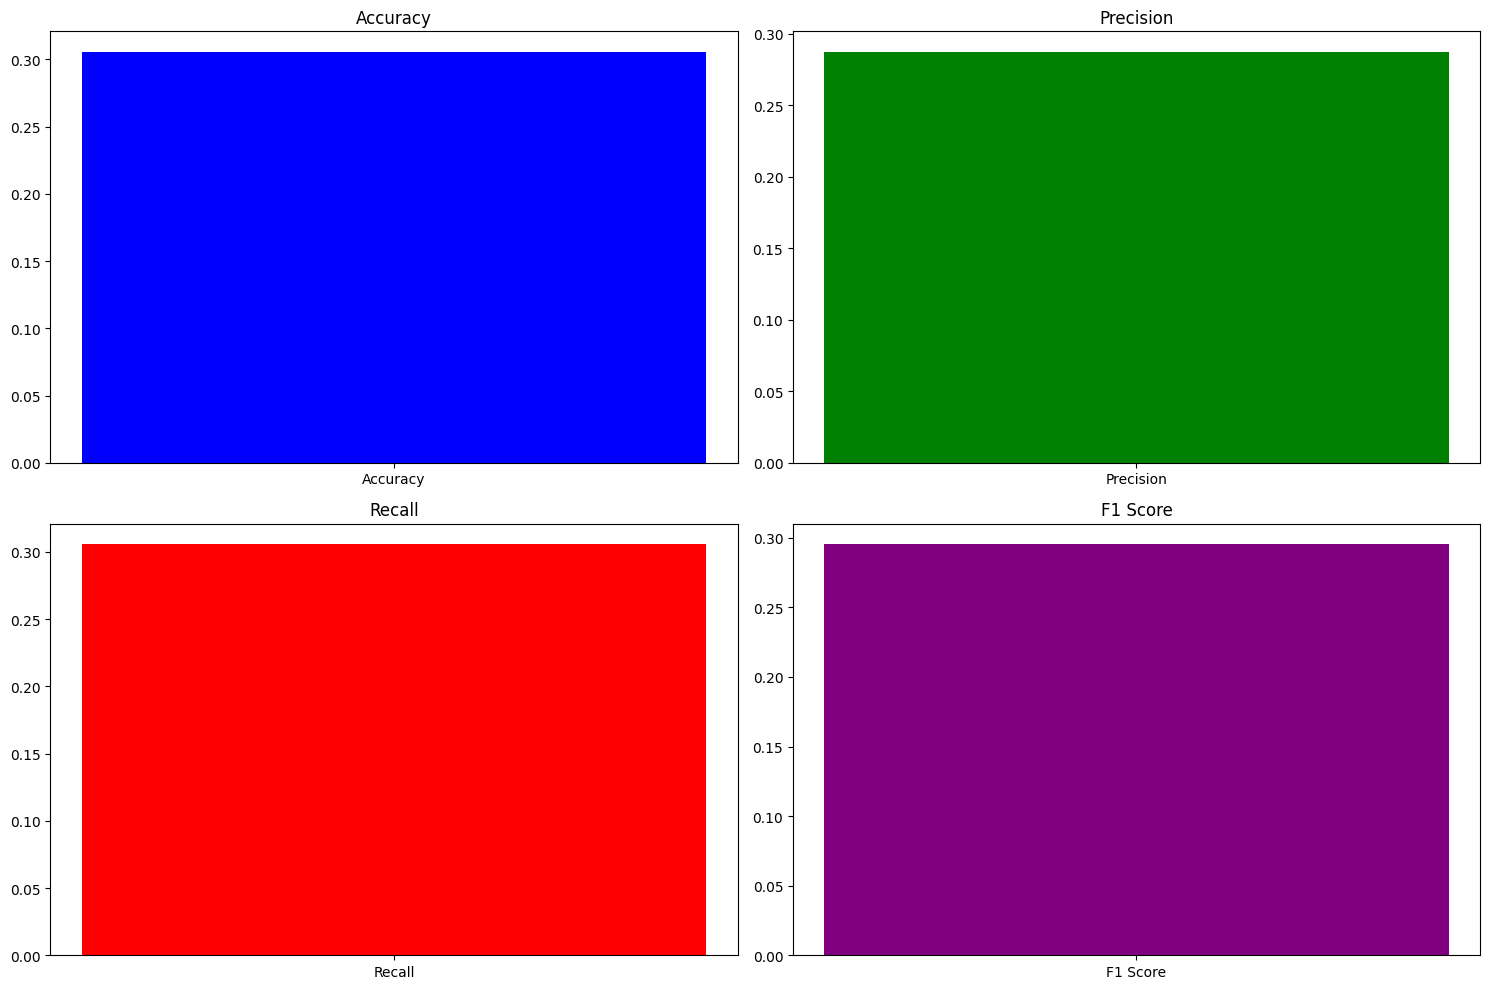

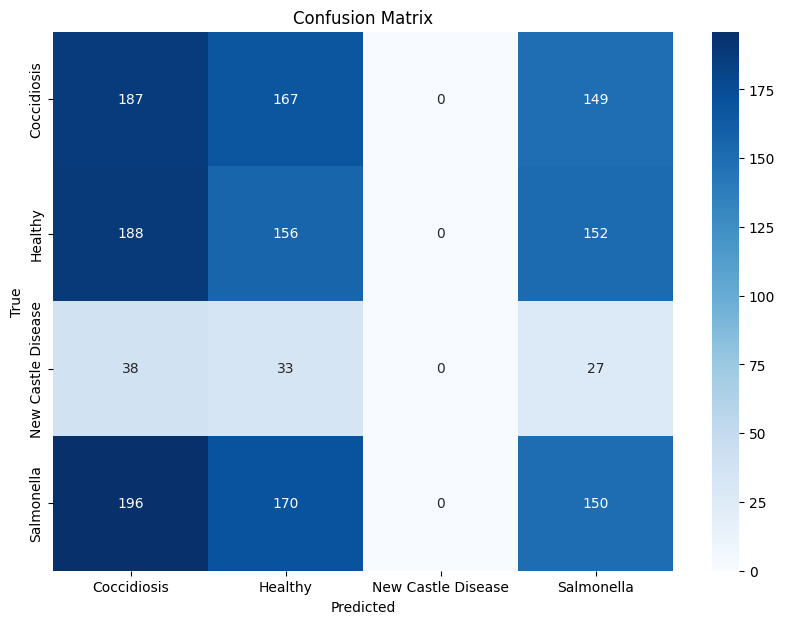

In [3]:
def plot_metrics(accuracy, precision, recall, f1, cm):
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].bar(['Accuracy'], [accuracy], color='blue')
    axes[0, 0].set_title('Accuracy')

    # Precision
    axes[0, 1].bar(['Precision'], [precision], color='green')
    axes[0, 1].set_title('Precision')

    # Recall
    axes[1, 0].bar(['Recall'], [recall], color='red')
    axes[1, 0].set_title('Recall')

    # F1 Score
    axes[1, 1].bar(['F1 Score'], [f1], color='purple')
    axes[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example of how to use the plot_metrics function
plot_metrics(accuracy, precision, recall, f1, cm)


1. **Accuracy Graph**:
   - **Explanation**: This graph shows the accuracy of the model on the validation set. Accuracy is the ratio of correctly predicted instances to the total instances.

2. **Precision Graph**:
   - **Explanation**: Precision indicates the accuracy of positive predictions. It is the ratio of true positive predictions to the sum of true and false positives.

3. **Recall Graph**:
   - **Explanation**: Recall measures the ability of the model to find all relevant cases within the dataset. It is the ratio of true positive predictions to the sum of true positives and false negatives.

4. **F1 Score Graph**:
   - **Explanation**: The F1 score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that accounts for both.

5. **Confusion Matrix**:
   - **Explanation**: The confusion matrix visualizes the performance of the classification model. It shows the counts of true positive, true negative, false positive, and false negative predictions.

Found 1613 validated image filenames belonging to 4 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 170s 7s/step


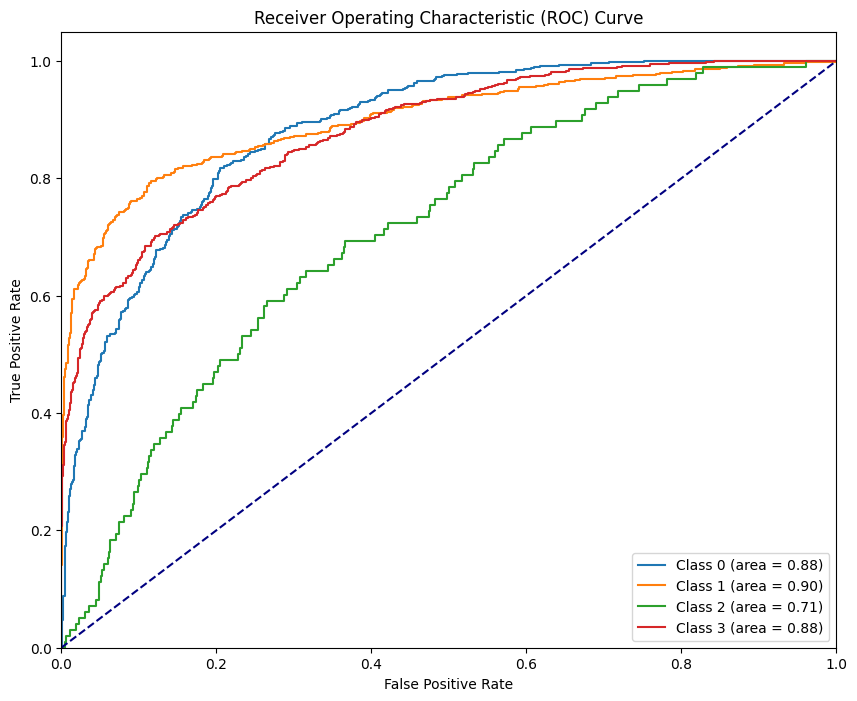

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Load the saved model
model = tf.keras.models.load_model('chicken_disease_model.h5')

# Define paths
base_dir = 'C:/Users/maryc/Documents/chickendetection code/archive (2)'
train_dir = os.path.join(base_dir, 'Train')
csv_file = os.path.join(base_dir, 'train_data.csv')

# Load CSV file
data = pd.read_csv(csv_file)

# Create ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a generator for validation data
batch_size = 64
validation_generator = datagen.flow_from_dataframe(
    dataframe=data,
    directory=train_dir,
    x_col='images',  # make sure this matches the column name in your CSV
    y_col='label',  # make sure this matches the column name in your CSV
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',  # Use categorical for multi-class classification
    subset='validation',
    shuffle=False  # Important: to keep order for evaluation
)

# Get the number of classes from the generator's class indices
num_classes = len(validation_generator.class_indices)

# Get the ground truth labels and predictions
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# One-hot encode y_true for multi-class ROC curve calculation
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)

# Plot ROC curve for each class
fpr = {}
tpr = {}
roc_auc_dict = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc_dict[i] = roc_auc_score(y_true_one_hot[:, i], y_pred[:, i])

plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_dict[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

6. **ROC Curve for Each Class**:
   - **Explanation**: The ROC curve illustrates the diagnostic ability of the classifier across different threshold settings. Each curve shows the trade-off between true positive rate (sensitivity) and false positive rate for a particular class.

CHICKEN STOLEN/INTRUDER DETECTION

using mobilessdnet

In [17]:
pip install opencv-python-headless numpy

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/26/d0/22f68eb23eea053a31655960f133c0be9726c6a881547e6e9e7e2a946c4f/opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


GRAPHS

Number of Detections Over Time:
Tracks the number of detected chickens and intruders over time.

Confidence Levels:
Displays the confidence levels of detections over time.

Missing Chickens Alerts:
Shows when and how many chickens were reported missing over time.

Intruder Alerts:
Shows when and how many intruders were detected over time.

Heatmap of Detections:
Displays a heatmap of the locations of chicken and intruder detections in the video frame

Alert: Intruder 2_76 detected!
Alert: Intruder 2_69 detected!
Alert: Intruder 4_69 detected!
Alert: Intruder -5_66 detected!
Alert: Intruder 2_43 detected!
Alert: Intruder -4_44 detected!
Alert: Intruder 0_38 detected!
Alert: Intruder 3_35 detected!
Alert: Intruder 3_90 detected!
Alert: Intruder 5_58 detected!
Alert: Intruder 5_60 detected!
Alert: Intruder 6_41 detected!
Alert: Intruder 20_73 detected!
Alert: Intruder -2_86 detected!
Alert: Intruder 0_150 detected!
Alert: Intruder 3_77 detected!
Alert: Intruder -1_89 detected!
Alert: Intruder 3_43 detected!
Alert: Intruder 3_78 detected!
Alert: Intruder 11_94 detected!
Alert: Intruder -3_66 detected!
Alert: Intruder 36_193 detected!
Alert: Intruder 19_241 detected!
Alert: Intruder 6_284 detected!
Alert: Intruder 3_258 detected!
Alert: Intruder 2_270 detected!
Alert: Intruder 0_314 detected!


C:\Users\maryc\AppData\Local\Temp\ipykernel_7704\1557847555.py:148: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  intruder_count = intruder_alerts_df.groupby(intruder_alerts_df['time'].dt.floor('T')).size()


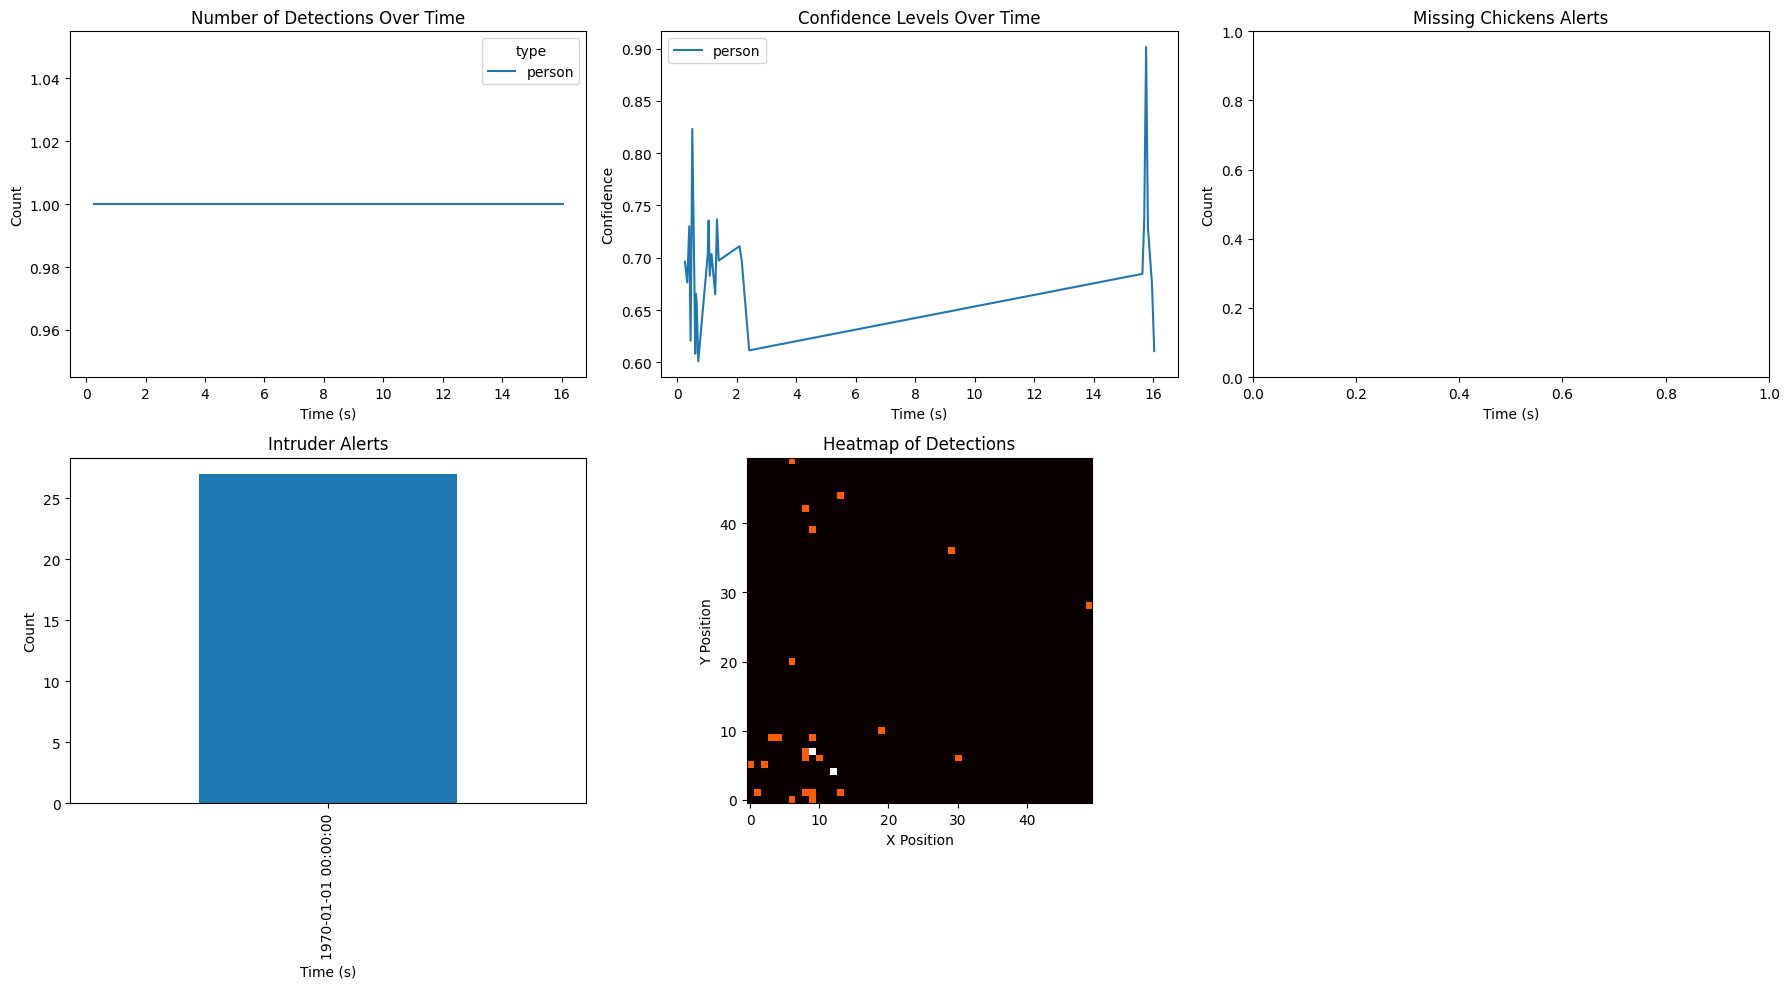

In [25]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

# Class labels MobileNet SSD can detect (based on the model's training)
class_labels = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle',
                6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable',
                12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant',
                17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}

# Define class IDs for chickens and intruders
CHICKEN_CLASS_ID = 3  # Typically 'bird' is used as a proxy for chicken in generic models
INTRUDER_CLASS_IDS = [12, 15, 8]  # 'dog', 'person', 'cat'

# Set the video source
video_path = '0704(1).mp4'  # Update with your video path
cap = cv2.VideoCapture(video_path)

# Initialize dictionaries and lists for tracking and plotting
chicken_dict = {}
intruder_dict = {}

# Data for plots
detection_data = []
missing_chickens_data = []
intruder_alerts_data = []
detection_positions = []

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration = frame_count / fps

start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame for faster processing
    frame_resized = cv2.resize(frame, (300, 300))
    blob = cv2.dnn.blobFromImage(frame_resized, 0.007843, (300, 300), 127.5)

    # Pass the blob through the network
    net.setInput(blob)
    detections = net.forward()

    current_chickens = {}
    current_intruders = {}

    timestamp = time.time() - start_time  # Use elapsed time for consistent timestamp

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.6:  # Confidence threshold
            class_id = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            x, y, w, h = box.astype(int)

            # Create unique identifier for tracking
            unique_id = f"{x}_{y}"

            if class_id == CHICKEN_CLASS_ID:
                # Chicken detection
                current_chickens[unique_id] = (x, timestamp)
                color = (0, 255, 0)  # Green for chickens
                label = 'Chicken'
            elif class_id in INTRUDER_CLASS_IDS:
                # Intruder detection
                current_intruders[unique_id] = (x, timestamp)
                color = (0, 0, 255)  # Red for intruders
                label = class_labels[class_id]
            else:
                continue

            # Draw bounding boxes
            cv2.rectangle(frame, (x, y), (w, h), color, 2)
            cv2.putText(frame, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Append data for plots
            detection_data.append({'time': timestamp, 'type': label, 'confidence': confidence})
            detection_positions.append((x, y))

    # Check for missing chickens
    for chicken_id in list(chicken_dict.keys()):
        if chicken_id not in current_chickens:
            missing_chickens_data.append({'time': timestamp, 'chicken_id': chicken_id})
            print(f"Alert: Chicken {chicken_id} is missing!")
            del chicken_dict[chicken_id]

    # Check for new intruders
    for intruder_id in current_intruders:
        if intruder_id not in intruder_dict:
            intruder_alerts_data.append({'time': timestamp, 'intruder_id': intruder_id})
            print(f"Alert: Intruder {intruder_id} detected!")

    # Update dictionaries
    chicken_dict.update(current_chickens)
    intruder_dict.update(current_intruders)

# Release resources
cap.release()

# Convert data to DataFrames for plotting
detection_df = pd.DataFrame(detection_data)
missing_chickens_df = pd.DataFrame(missing_chickens_data)
intruder_alerts_df = pd.DataFrame(intruder_alerts_data)

# Plot the graphs
plt.figure(figsize=(18, 10))

# 1. Number of Detections Over Time
plt.subplot(2, 3, 1)
detection_count = detection_df.groupby(['time', 'type']).size().unstack(fill_value=0)
detection_count.plot(ax=plt.gca(), title='Number of Detections Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 2. Confidence Levels Over Time
plt.subplot(2, 3, 2)
for label, group in detection_df.groupby('type'):
    plt.plot(group['time'], group['confidence'], label=label)
plt.title('Confidence Levels Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Confidence')
plt.legend()

# 3. Missing Chickens Alerts
plt.subplot(2, 3, 3)
if not missing_chickens_df.empty:
    missing_chickens_df['time'] = pd.to_datetime(missing_chickens_df['time'], unit='s')
    missing_count = missing_chickens_df.groupby(missing_chickens_df['time'].dt.floor('T')).size()
    missing_count.plot(kind='bar', ax=plt.gca())
plt.title('Missing Chickens Alerts')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 4. Intruder Alerts
plt.subplot(2, 3, 4)
if not intruder_alerts_df.empty:
    intruder_alerts_df['time'] = pd.to_datetime(intruder_alerts_df['time'], unit='s')
    intruder_count = intruder_alerts_df.groupby(intruder_alerts_df['time'].dt.floor('T')).size()
    intruder_count.plot(kind='bar', ax=plt.gca())
plt.title('Intruder Alerts')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 5. Heatmap of Detections
plt.subplot(2, 3, 5)
if detection_positions:
    x_positions, y_positions = zip(*detection_positions)
    heatmap, xedges, yedges = np.histogram2d(x_positions, y_positions, bins=50)
    plt.imshow(heatmap.T, origin='lower', cmap='hot', interpolation='nearest')
plt.title('Heatmap of Detections')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.tight_layout()
plt.show()


GRAPHS

Number of Detections Over Time:
Tracks the number of detected chickens and intruders over time.

Confidence Levels:
Displays the confidence levels of detections over time.

Missing Chickens Alerts:
Shows when and how many chickens were reported missing over time.

Intruder Alerts:
Shows when and how many intruders were detected over time.

Heatmap of Detections:
Displays a heatmap of the locations of chicken and intruder detections in the video frame

Alert: Intruder 324_281 detected!
Alert: Intruder 329_278 detected!
Alert: Intruder 330_281 detected!
Alert: Intruder 315_277 detected!
Alert: Intruder 314_280 detected!
Alert: Chicken 307_251 is missing!
Alert: Intruder 311_254 detected!
Alert: Intruder 289_242 detected!
Alert: Intruder 282_248 detected!
Alert: Chicken 286_214 is missing!
Alert: Chicken 283_225 is missing!
Alert: Chicken 281_221 is missing!
Alert: Chicken 289_218 is missing!
Alert: Chicken 295_217 is missing!
Alert: Chicken 288_219 is missing!
Alert: Chicken 254_227 is missing!
Alert: Chicken 254_235 is missing!
Alert: Chicken 279_236 is missing!
Alert: Chicken 281_236 is missing!
Alert: Chicken 272_237 is missing!
Alert: Chicken 242_230 is missing!
Alert: Chicken 193_229 is missing!
Alert: Chicken 184_231 is missing!
Alert: Intruder 183_229 detected!
Alert: Chicken 181_233 is missing!
Alert: Chicken 197_231 is missing!
Alert: Chicken 198_219 is missing!
Alert: Chicken 179_221 is missing!
Alert: Chicken 183_219 is mis

C:\Users\maryc\AppData\Local\Temp\ipykernel_7704\609851172.py:138: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  missing_count = missing_chickens_df.groupby(missing_chickens_df['time'].dt.floor('T')).size()
C:\Users\maryc\AppData\Local\Temp\ipykernel_7704\609851172.py:148: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  intruder_count = intruder_alerts_df.groupby(intruder_alerts_df['time'].dt.floor('T')).size()


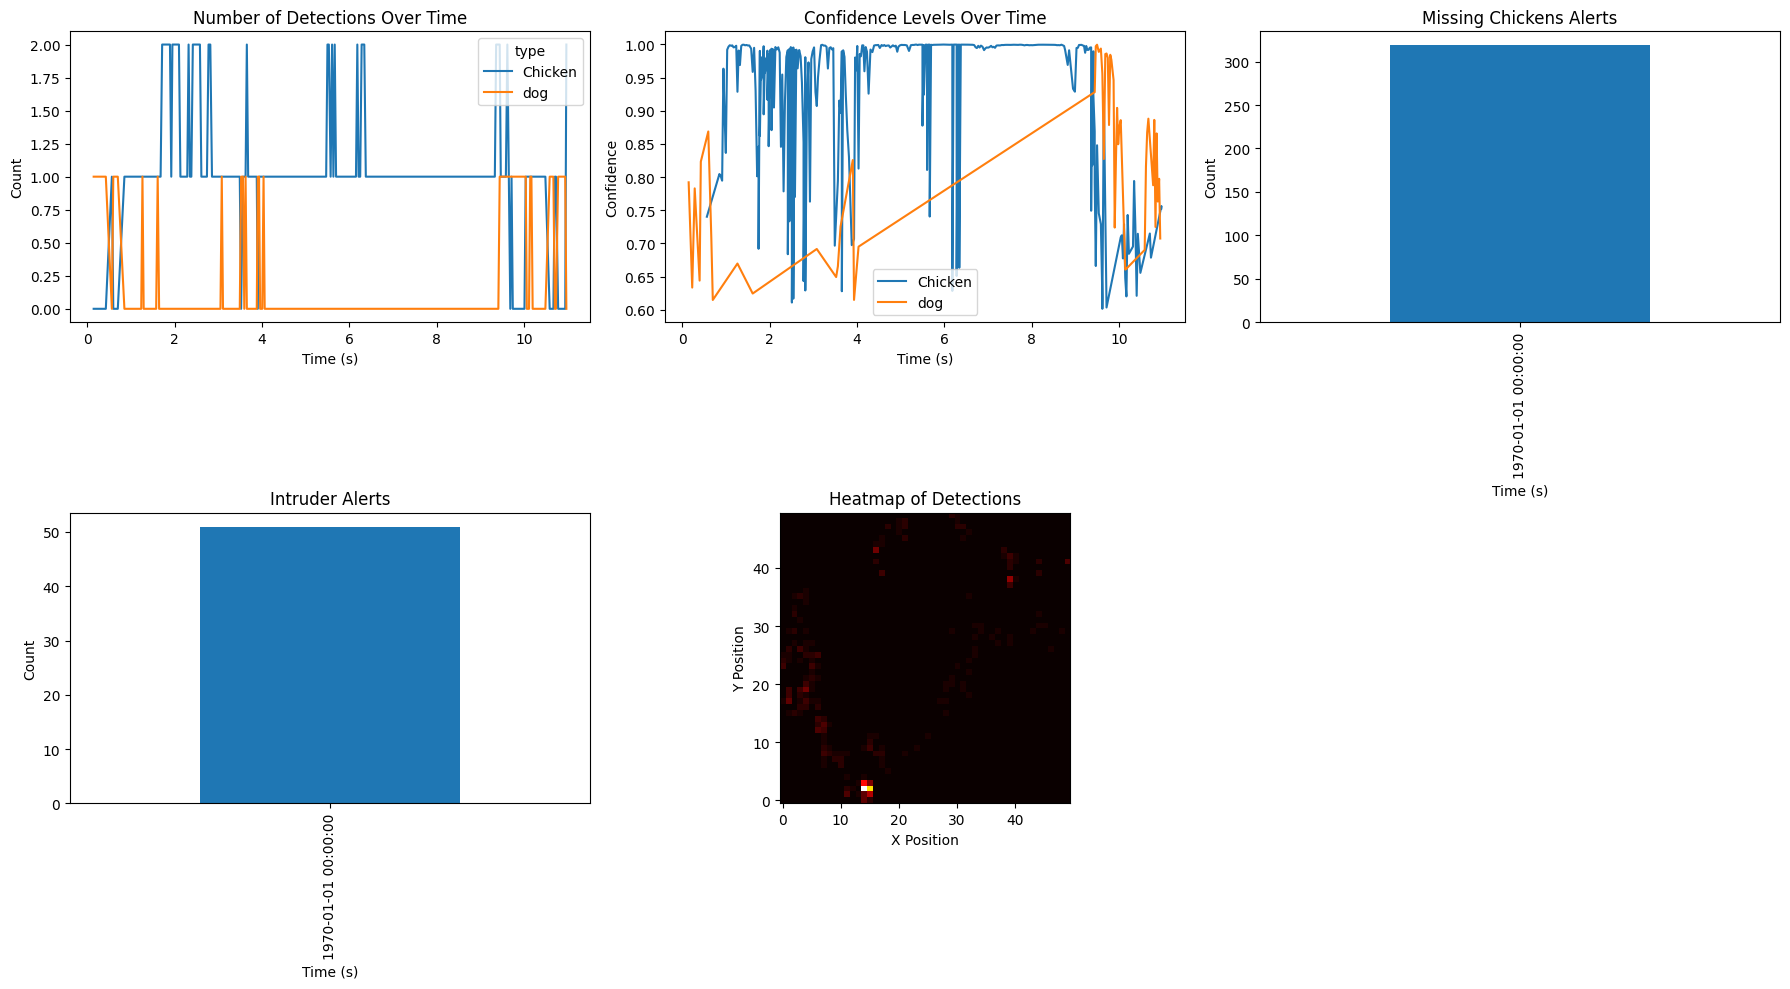

In [26]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the pre-trained MobileNet SSD model
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

# Class labels MobileNet SSD can detect (based on the model's training)
class_labels = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle',
                6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable',
                12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant',
                17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}

# Define class IDs for chickens and intruders
CHICKEN_CLASS_ID = 3  # Typically 'bird' is used as a proxy for chicken in generic models
INTRUDER_CLASS_IDS = [12, 15, 8]  # 'dog', 'person', 'cat'

# Set the video source
video_path = '856986-hd_1920_1080_25fps.mp4'  # Update with your video path
cap = cv2.VideoCapture(video_path)

# Initialize dictionaries and lists for tracking and plotting
chicken_dict = {}
intruder_dict = {}

# Data for plots
detection_data = []
missing_chickens_data = []
intruder_alerts_data = []
detection_positions = []

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration = frame_count / fps

start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame for faster processing
    frame_resized = cv2.resize(frame, (300, 300))
    blob = cv2.dnn.blobFromImage(frame_resized, 0.007843, (300, 300), 127.5)

    # Pass the blob through the network
    net.setInput(blob)
    detections = net.forward()

    current_chickens = {}
    current_intruders = {}

    timestamp = time.time() - start_time  # Use elapsed time for consistent timestamp

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.6:  # Confidence threshold
            class_id = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            x, y, w, h = box.astype(int)

            # Create unique identifier for tracking
            unique_id = f"{x}_{y}"

            if class_id == CHICKEN_CLASS_ID:
                # Chicken detection
                current_chickens[unique_id] = (x, timestamp)
                color = (0, 255, 0)  # Green for chickens
                label = 'Chicken'
            elif class_id in INTRUDER_CLASS_IDS:
                # Intruder detection
                current_intruders[unique_id] = (x, timestamp)
                color = (0, 0, 255)  # Red for intruders
                label = class_labels[class_id]
            else:
                continue

            # Draw bounding boxes
            cv2.rectangle(frame, (x, y), (w, h), color, 2)
            cv2.putText(frame, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Append data for plots
            detection_data.append({'time': timestamp, 'type': label, 'confidence': confidence})
            detection_positions.append((x, y))

    # Check for missing chickens
    for chicken_id in list(chicken_dict.keys()):
        if chicken_id not in current_chickens:
            missing_chickens_data.append({'time': timestamp, 'chicken_id': chicken_id})
            print(f"Alert: Chicken {chicken_id} is missing!")
            del chicken_dict[chicken_id]

    # Check for new intruders
    for intruder_id in current_intruders:
        if intruder_id not in intruder_dict:
            intruder_alerts_data.append({'time': timestamp, 'intruder_id': intruder_id})
            print(f"Alert: Intruder {intruder_id} detected!")

    # Update dictionaries
    chicken_dict.update(current_chickens)
    intruder_dict.update(current_intruders)

# Release resources
cap.release()

# Convert data to DataFrames for plotting
detection_df = pd.DataFrame(detection_data)
missing_chickens_df = pd.DataFrame(missing_chickens_data)
intruder_alerts_df = pd.DataFrame(intruder_alerts_data)

# Plot the graphs
plt.figure(figsize=(18, 10))

# 1. Number of Detections Over Time
plt.subplot(2, 3, 1)
detection_count = detection_df.groupby(['time', 'type']).size().unstack(fill_value=0)
detection_count.plot(ax=plt.gca(), title='Number of Detections Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 2. Confidence Levels Over Time
plt.subplot(2, 3, 2)
for label, group in detection_df.groupby('type'):
    plt.plot(group['time'], group['confidence'], label=label)
plt.title('Confidence Levels Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Confidence')
plt.legend()

# 3. Missing Chickens Alerts
plt.subplot(2, 3, 3)
if not missing_chickens_df.empty:
    missing_chickens_df['time'] = pd.to_datetime(missing_chickens_df['time'], unit='s')
    missing_count = missing_chickens_df.groupby(missing_chickens_df['time'].dt.floor('T')).size()
    missing_count.plot(kind='bar', ax=plt.gca())
plt.title('Missing Chickens Alerts')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 4. Intruder Alerts
plt.subplot(2, 3, 4)
if not intruder_alerts_df.empty:
    intruder_alerts_df['time'] = pd.to_datetime(intruder_alerts_df['time'], unit='s')
    intruder_count = intruder_alerts_df.groupby(intruder_alerts_df['time'].dt.floor('T')).size()
    intruder_count.plot(kind='bar', ax=plt.gca())
plt.title('Intruder Alerts')
plt.xlabel('Time (s)')
plt.ylabel('Count')

# 5. Heatmap of Detections
plt.subplot(2, 3, 5)
if detection_positions:
    x_positions, y_positions = zip(*detection_positions)
    heatmap, xedges, yedges = np.histogram2d(x_positions, y_positions, bins=50)
    plt.imshow(heatmap.T, origin='lower', cmap='hot', interpolation='nearest')
plt.title('Heatmap of Detections')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.tight_layout()
plt.show()
